<a href="https://colab.research.google.com/github/rajan-dhinoja/Machine_Learning_Mastery/blob/main/Regression_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Regression Template**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print("✅ Required Libraries are Imported - Done!\n")

Mounted at /content/drive
✅ Required Libraries are Imported - Done!



## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [ ]:
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/REGRESSION/Big_Mart_Sales/train_set.csv'))
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/REGRESSION/Flight_Price_Prediction/business.csv'))
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/REGRESSION/Flight_Price_Prediction/economy.csv'))
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/REGRESSION/car_price_prediction.csv'))
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/REGRESSION/insurance.csv'))
dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/REGRESSION/medical_premium.csv'))
dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...\n")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...\n")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

❌ No Categorical Columns Found...

✅ Numerical Columns found: 
 Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')


In [ ]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe().to_string(header=True))

> Shape of the Dataset:  (986, 11) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB
None 

> Statistical summary of the Dataset:
         Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyCh

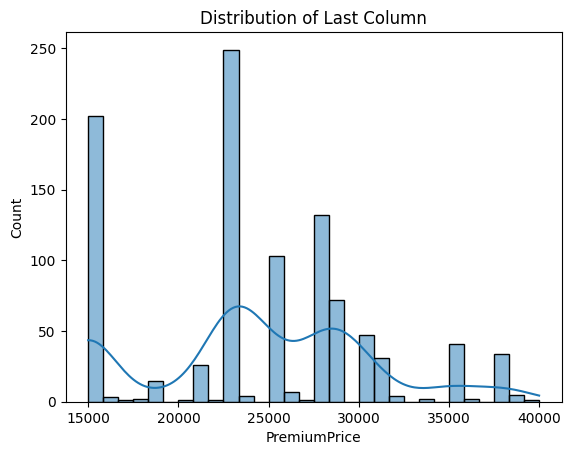

In [ ]:
# plt.figure(figsize=(10, 6))
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

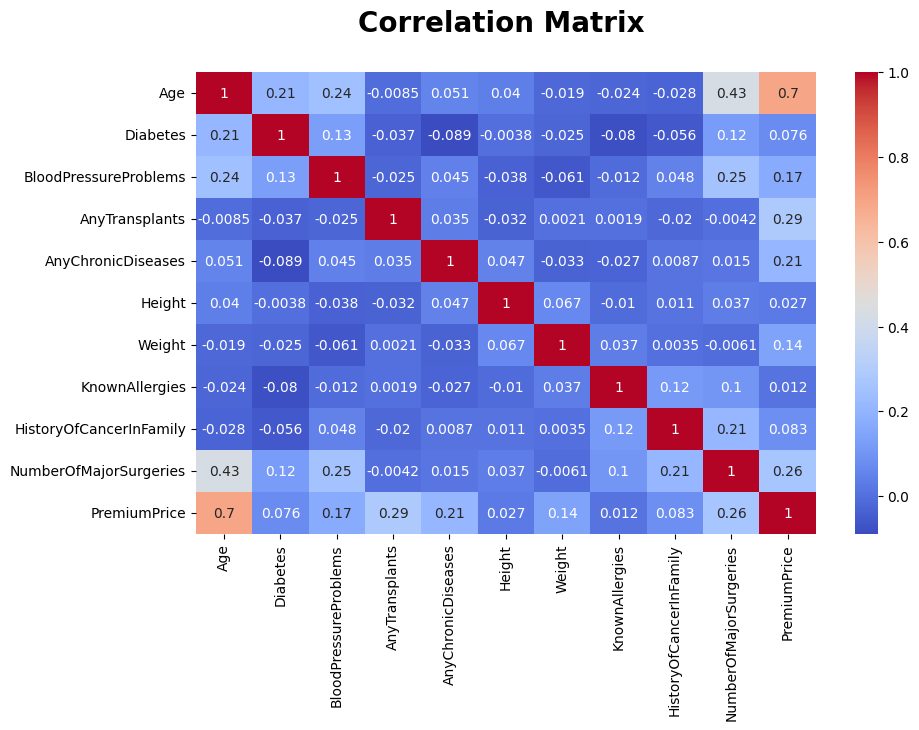

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [ ]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

❌ No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [ ]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...")
      # print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("❌ No missing data found...")



❌ No missing data found...


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [ ]:
# for col in dataset.columns:
#   value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

#   print(f"Column: \t\t'{col}'")
#   print(value_counts_dataset.T.to_string(header=False), "\n")

### Step-3.4: Checking for Stopwords and Stemming them:-

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

if categorical_cols.any():

  nltk.download('stopwords')

  stop_words = set(stopwords.words('english'))
  # stop_words = stop_words.remove('not')
  # print("\n Stop Words are: ", stop_words, "\n")
  def stemming(text):
      words = text.lower().split()

      stemmer = PorterStemmer()
      stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
      return ' '.join(stemmed_words)  # Join stemmed words back into a string

  # Apply the stemming function to the specified columns
  for column in categorical_cols:
      dataset[column] = dataset[column].astype(str).apply(stemming)

  print("\n ✅ Stemming Completed Successfully... \n")
  # print(dataset.head().to_string(header=True))
else:
  print("❌ No Stemming Needed...")

❌ No Stemming Needed...


### Step-3.5: Checking any Categorical Data and Encoding them:-

In [ ]:
# `sklearn.compose` is a module in scikit-learn (a popular Python machine learning library) used for combining different data transformations.
# sklearn.preprocessing is a module within scikit-learn that provides tools for preparing your data for machine learning algorithms.
# LabelEncoder is a specific class designed to convert categorical labels (like 'France', 'Spain', 'Germany') into numerical labels (like 0, 1, 2).

import scipy.sparse
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

repeating_cols = []

if categorical_cols.empty:
  print("❌ No Encoding needed! No Categorical Columns Found...")
else:
  for col in categorical_cols:
      # Matrix of Feature
      if col != dataset.columns[-1]:
        print(f"> String Values present in Column '{col}'.")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          repeating_cols.append(col)
          # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
          print(f"\t- Also, Categorical values found in column '{col}'.")
          print(f"\t✅ '{col}' is Encoded Successfully...\n")

        else:
          print(f"\t❌ But No Categorical values found in column '{col}'.\n")

      # Dependent Variable/Output
      if col == dataset.columns[-1]:
        print(f"> String Values present in Column '{col}'(Output Column).")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}")
          print(f"\t- Also, Categorical values found in column '{col}'.")
          le = LabelEncoder()
          y = le.fit_transform(dataset[col])
          print(f"\t✅ '{col}' is Encoded Successfully...\n")
        else:
          print(f"\t❌ But No Categorical values found in column '{col}'.\n")

  print("=> Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
  if repeating_cols:
    encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
    encoder_transform = encoder.fit_transform(X)

    # Conditional conversion to dense array
    if scipy.sparse.issparse(encoder_transform):  # Check if sparse
      X = encoder_transform.toarray()
    else:
      X = encoder_transform

  else:
    print("❌ No Repeating Columns found in Matrix of Features(X). \n")

  # print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True))
  # print("\n")
  # print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=False, index=False))


❌ No Encoding needed! No Categorical Columns Found...


## Step-4: Split the Dataset into the Training set and Test set:-

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitted Successfully...\n")
# print("Printing Training Sets: ")
# print("> X_train: \n", X_train)
# print("> X_test: \n", X_test, "\n")

# print("\n")

# print("Printing Test Sets: ")
# print("> y_train: \n", y_train)
# print("> y_test: \n", y_test)

✅ Data Splitted Successfully...



## Step-5: Feature Scaling:-

In [ ]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Convert X_train and X_test to NumPy arrays if they are DataFrames
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Iterate through columns of X_train and X_test
for col in range(X_train.shape[1]):  # Use range to get column indices
    # Check if all values in the column are 0 or 1
    if np.all(np.isin(X_train[:, col], [0, 1])):
        continue  # Skip scaling for this column
    else:
        # Reshape the column before scaling
        X_train[:, col] = scaler.fit_transform(X_train[:, col].reshape(-1, 1)).flatten()
        X_test[:, col] = scaler.transform(X_test[:, col].reshape(-1, 1)).flatten()

print("✅ Feature Scaling is Done Successfully...")

# print("Printing Training Sets after Feature Scaling:")
# print("> X_train: \n", X_train)
# print("\n")
# print("Printing Test Sets after Feature Scaling:")
# print("> X_test: \n", X_test)
# print("\n")
# print(pd.DataFrame(X).head().to_string())

✅ Feature Scaling is Done Successfully...


# ***Step-B: Model Builing & Evaluation...***

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    SVR(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    # Ridge(),
    # Lasso(),
    # ElasticNet(),
    # LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
}

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
  cv_score = cross_val_score(model, X_train, y_train, cv=5)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)

  print(f"✅ {model.__class__.__name__} is trained Sucessfully...")
  print(f"-> {model.__class__.__name__}:-")
  print(f"\t R² Score:\t\t{r2:.2f}")
  print(f"\t Adj. R² Score: {adj_r2:.2f}")
  print(f"\t CV Score: \t\t{cv_score.mean()*100:.2f}%")
  print(f"\t MSE: \t\t\t{mse:.2f}")
  print(f"\t RMSE: \t\t\t{rmse:.2f}")
  print(f"\t MAE: \t\t\t{mae:.2f}")
  print("\n")


✅ LinearRegression is trained Sucessfully...
-> LinearRegression:-
	 R² Score:		0.63
	 Adj. R² Score: 0.61
	 CV Score: 		49.21%
	 MSE: 			15717897.24
	 RMSE: 			3964.58
	 MAE: 			2943.38


✅ KNeighborsRegressor is trained Sucessfully...
-> KNeighborsRegressor:-
	 R² Score:		0.57
	 Adj. R² Score: 0.55
	 CV Score: 		44.44%
	 MSE: 			18311717.17
	 RMSE: 			4279.22
	 MAE: 			2942.42


✅ RandomForestRegressor is trained Sucessfully...
-> RandomForestRegressor:-
	 R² Score:		0.64
	 Adj. R² Score: 0.62
	 CV Score: 		53.89%
	 MSE: 			15341570.77
	 RMSE: 			3916.83
	 MAE: 			2500.13


✅ SVR is trained Sucessfully...
-> SVR:-
	 R² Score:		-0.05
	 Adj. R² Score: -0.11
	 CV Score: 		-3.71%
	 MSE: 			44877090.12
	 RMSE: 			6699.04
	 MAE: 			5313.26


✅ GradientBoostingRegressor is trained Sucessfully...
-> GradientBoostingRegressor:-
	 R² Score:		0.70
	 Adj. R² Score: 0.68
	 CV Score: 		59.29%
	 MSE: 			12988685.84
	 RMSE: 			3603.98
	 MAE: 			2464.90


✅ XGBRegressor is trained Sucessfully...
-> X

# ***Step-C: Saving the Model & Testing It...***

## Step-1: Saving the Model(.sav):-

In [ ]:
import pickle

# Train and save models
for model in models:
    # model.fit(X_train, y_train)

    # Save each model with its name
    model_filename = f"{model.__class__.__name__}.sav"
    pickle.dump(model, open(model_filename, "wb"))

    print(f"✅ Model saved: {model_filename}")

✅ Model saved: LinearRegression.sav
✅ Model saved: KNeighborsRegressor.sav
✅ Model saved: RandomForestRegressor.sav
✅ Model saved: SVR.sav
✅ Model saved: GradientBoostingRegressor.sav
✅ Model saved: XGBRegressor.sav
✅ Model saved: DecisionTreeRegressor.sav


## Step-2: Predicting and Testing the Model:-

In [ ]:
correct_predictions = 0
max_correct_predictions = 0
model_predictions = {} # dictionary to store model and their correct predictions

random_input = np.random.randint(2, 5)
# random_input = np.random.randint(2, 10)
print("Number of Inputs for Predction: ", random_input, "\n")

for i in range(random_input):

  sample_input = pd.DataFrame(X_train).iloc[i].values.reshape(1, -1)  # Convert a row to an array
  sample_output = round(y_train[i], 2)

  print("Before Predicting, Sample Data & Output Sales are:-")
  print("> Sample Data: ", sample_input)
  print("> Output: ",sample_output, "\n")

  for model in models:
    model = pickle.load(open(f"{model.__class__.__name__}.sav", "rb"))
    model_filename = f"{model.__class__.__name__}.sav"
    print(f"-> {model.__class__.__name__}:-")

    prediction = model.predict(sample_input)
    # print(" - Predicted Sales:", prediction[0])
    rounded_prediction = round(prediction[0], 2)
    print(f" - Predicted Sales: {rounded_prediction:.2f}")

    if rounded_prediction == sample_output:
        correct_predictions += 1
        print("\t✅ Nice Work! your Prediction is correct...\n")
        # increment correct prediction count for the model in the dictionary
        model_predictions[model.__class__.__name__] = model_predictions.get(model.__class__.__name__, 0) + 1
    else:
        print("\t❌ Oops! your Prediction is incorrect...\n")

  print("="*75, "\n")

Number of Inputs for Predction:  2 

Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[-1  0  0  0  0 -2 -1  0  0  0]]
> Output:  15000 

-> LinearRegression:-
 - Predicted Sales: 15492.97
	❌ Oops! your Prediction is incorrect...

-> KNeighborsRegressor:-
 - Predicted Sales: 15000.00
	✅ Nice Work! your Prediction is correct...

-> RandomForestRegressor:-
 - Predicted Sales: 15005.00
	❌ Oops! your Prediction is incorrect...

-> SVR:-
 - Predicted Sales: 23024.83
	❌ Oops! your Prediction is incorrect...

-> GradientBoostingRegressor:-
 - Predicted Sales: 15006.44
	❌ Oops! your Prediction is incorrect...

-> XGBRegressor:-
 - Predicted Sales: 14888.92
	❌ Oops! your Prediction is incorrect...

-> DecisionTreeRegressor:-
 - Predicted Sales: 15000.00
	✅ Nice Work! your Prediction is correct...


Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[0 0 1 0 0 0 0 0 0 0]]
> Output:  34000 

-> LinearRegression:-
 - Predicted Sales: 23356.82
	❌ Oops! your Pre

## Step-3: Selecting the Perfect Model for this Dataset:-

In [ ]:
# Instead of using max, we'll iterate and check for at least one correct prediction
models_with_correct_predictions = []  # List to store models with at least one correct prediction

for model_name, correct_count in model_predictions.items():
    if correct_count >= 1:  # Check for at least one correct prediction
        models_with_correct_predictions.append(model_name)

# Print the results
if models_with_correct_predictions:
    print("The following Models achieved at least one correct Prediction:")
    for model_name in models_with_correct_predictions:
        print(f"\t- ✅ '{model_name}':\n\t\t\t '{model_predictions[model_name]}' out of {random_input} correct predictions")
else:
    print("No models achieved any correct predictions on the samples.")

The following Models achieved at least one correct Prediction:
	- ✅ 'KNeighborsRegressor':
			 '1' out of 2 correct predictions
	- ✅ 'DecisionTreeRegressor':
			 '1' out of 2 correct predictions


In [ ]:
# Instead of using max, we'll iterate and check for perfect predictions
best_models = []  # List to store all perfectly predicting models

for model_name, correct_count in model_predictions.items():
    if correct_count == random_input:  # Assuming you're testing on 5 samples
        best_models.append(model_name)

# Print the results
if best_models:
    print("The following Models achieved all perfect Predictions:")
    for model_name in best_models:
      print(f"\t- ✅ '{model_name}: \n\t\t\t with '{model_predictions[model_name]}' correct predictions")
else:
    print("No models achieved perfect predictions on all samples.")

No models achieved perfect predictions on all samples.
